### Q.1

##### <span style='color:red'>Show that if X has linearly independent columns, then $X^TX$ is invertible, and $X^+ = (X^TX)^{-1}X^T$ .</span>

Do a SVD on X:  
$X=QDP^T$, where $Q\subset \mathbb{R} ^{m\times m}, P\subset \mathbb{R} ^{q\times q}, D\subset \mathbb{R} ^{m\times q}$. Both $Q$ and $P$ are orthonormal matrices.   $D$ is full column as well and $\lambda_i >0, \forall i$. 
$D = \begin{bmatrix}\lambda_1 & 0 & \cdots & 0 \\ 0 & \lambda_2 & \cdots & \vdots \\ \vdots & & \ddots & \vdots \\ 0 & \cdots & 0 & \lambda_q\\ \vdots & \ddots &  & 0 \\ \vdots & & \ddots &\vdots \\ 0 & \cdots & \cdots & 0 \end{bmatrix}$   
So, $X^TX=PD^TQ^TQDP^T = PD^TDP^T$, which implies $|\det(X^TX)|=|det(P)||det(D^TD)||det(P^T)|$. 
Meanwhile, the determinant of orthonormal matrices are either 1 or -1, and $det(D^TD) = \Pi_{i=1}^q \lambda_i^2 \neq 0$. Thus $\det(X^TX)\neq 0$. We also know that $det(A) \neq 0 \iff A$ is invertible. Thus, $X^TX$ is invertible. 

(A).  Because $XX^+$ is invertible, we have $XX^+ = (X^+)^TX^T$  
(B).$XX^+X = X \Rightarrow (X^+)^TX^TX = X \Rightarrow  (X^+)^TX^TX(X^TX)^{-1} = X(X^TX)^{-1} \Rightarrow (X^+)^T = X(X^TX)^{-1} \Rightarrow X^+ = (X^TX)^{-1}X^T$

##### <span style='color:red'>Show that if X has linearly independent rows, then $XX^T$ is invertible, and $X^+ = X^T(X^TX)^{-1}$ .</span>

Do a SVD on X:  
$X=QDP^T$, where $Q\subset \mathbb{R} ^{m\times m}, P\subset \mathbb{R} ^{q\times q}, D\subset \mathbb{R} ^{m\times q}$. Both $Q$ and $P$ are orthonormal matrices.   $D$ is full row as well and $\lambda_i >0, \forall i$. 
$D = \begin{bmatrix}\lambda_1 & 0 & \cdots & 0 & \cdots & 0 \\ 0 & \lambda_2 & \cdots & \vdots & & \vdots \\ \vdots & & \ddots & \vdots & & \vdots \\ 0 & \cdots & 0 & \lambda_m & \cdots & 0\end{bmatrix}$  
So, $XX^T=QDP^TPD^TQ^T = QDD^TQ^T$, which implies $|\det(X^TX)|=|det(Q)||det(DD^T)||det(Q^T)|$. 
Meanwhile, the determinant of orthonormal matrices are either 1 or -1, and $det(DD^T) = \Pi_{i=1}^m \lambda_i^2 \neq 0$. Thus $\det(X^TX)\neq 0$. We also know that $det(A) \neq 0 \iff A$ is invertible. Thus, $XX^T$ is invertible. 

(C).  Because $X^+X$ is invertible, we have $X^+X = X^T(X^+)^T$  
(D). $XX^+X = X \Rightarrow XX^T(X^+)^T = X \Rightarrow  (X^TX)^{-1}XX^T(X^+)^T = (X^TX)^{-1}X \Rightarrow (X^+)^T =  (X^TX)^{-1}X \Rightarrow X^+ = X^T(X^TX)^{-1}$

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

### Q.2  Let f(x, y) = − log(1 − x − y) − log x − log y with domain D = {(x, y) : x + y < 1, x > 0, y > 0}.  
#### (a) Find the gradient and the Hessian of f on paper.

$\nabla f(x,y) = (\frac{\partial f(x,y)}{\partial x},\frac{\partial f(x,y)}{\partial y})^T = (\frac{1}{1-x-y}-\frac{1}{x}, \frac{1}{1-x-y}-\frac{1}{y})^T$  
  
$H = \begin{bmatrix} \frac{\partial^2 f(x,y)}{\partial x^2} & \frac{\partial^2 f(x,y)}{\partial x \partial y}\\ \frac{\partial^2 f(x,y)}{\partial y \partial x} & \frac{\partial^2 f(x,y)}{\partial y^2}  \end{bmatrix} =\begin{bmatrix} \frac{1}{(1-x-y)^2}+\frac{1}{x^2} & \frac{1}{(1-x-y)^2} \\ \frac{1}{(1-x-y)^2} & \frac{1}{(1-x-y)^2}+\frac{1}{y^2} \end{bmatrix}$

#### (b) Begin with an initial point in w_0_ ∈ D with η = 1 and estimate the global minimum of f using the Gradient descent method, which will provide you with points w1, w2, . . . ,. Report your initial point w0 and η of your choice. Draw a graph that shows the trajectory followed by the points at each iteration. Also, plot the energies f(w0), f(w1), . . . , achieved by the points at each iteration. Note: During the iterations, your point may “jump” out of D where f is undefined. If that happens, change your initial starting point and/or η.

In [21]:
np.random.seed(45)
# define a loss function
def losfunction (w):
    loss = -np.log(1-np.sum(w))-np.log(w[0])-np.log(w[1])
    return loss

#  setup
w = list()
loss = list()
epsilon = 0.005
eta = 1
j= 0
# give a dummy start point which will be deleted later so that index is working
temp = np.array([0.1,0.8])
temploss = losfunction(temp)
w.append(temp)
loss.append(temploss)

# initialize the starting point w_0 in D
temp = np.random.uniform(0,1,2)
while (np.sum(temp)>=1):
        temp = np.random.uniform(0,1,2)
# append the first point in w
w.append(temp)
temploss = losfunction(temp)
loss.append(temploss)

# the while loops ends when converge
while (np.abs(loss[-1]-loss[-2])>=epsilon):
    # find the gradient
    g = np.array([(1/(1-np.sum(w[-1]))-1/w[-1][0]),(1/(1-np.sum(w[-1]))-1/w[-1][1])])
    temp = w[-1]-eta*g
    # if counter k is larger than 5, the overall eta will be reduced by 1/2
    etanew = eta
    k = 0
    # if the temp is outside the D, will redo the while loop and add the counter
    while (sum(temp)>=1 or temp[0]<=0 or temp[1]<=0):
        etanew = etanew/2
        temp = w[-1]-etanew*g
        k += 1
        j += 1
    w.append(temp)
    temploss = losfunction(temp)
    loss.append(temploss)
    
    if k>=5:
        eta = eta/2
# delete the dummy point
del(w[0])
del(loss[0])
# convert w to ndarray for plot
w = np.asarray(w)
w[0]

array([ 0.2814473 ,  0.07728957])

#### <span style = 'color:red'>Q. Report your initial point w0 and η of your choice.</span>
#### <span style = 'color:blue'>The intial point is at [ 0.2814473 ,  0.07728957]. The intial eta is 1, but if the update is out of boundaries, eta will temporarily shrink by 1/2 until the update is within boundaries. Also, if it takes for more than 5 temporaty attempts to shrink the eta for one iteration, the overall eta will be shrinked by 1/2. </span>

#### <span style = 'color:red'>Q. Draw a graph that shows the trajectory followed by the points at each iteration. </span>

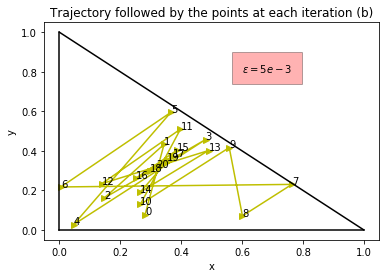

In [22]:
fig, ax = plt.subplots()
A = w[:,0]
B = w[:,1]
n = range(len(w))
plt.plot(A,B,'y->')
C = list(A)
for i, txt in enumerate(C):
    ax.annotate(n[i], (A[i],B[i]))
plt.plot([0,1],[1,0],'k-')
plt.plot([0,1],[0,0],'k-')
plt.plot([0,0],[0,1],'k-')
plt.xlabel('x')
plt.title('Trajectory followed by the points at each iteration (b)')
plt.ylabel('y')
ax.text(.6, .8, '$\epsilon =5e-3$', style='italic',
        bbox={'facecolor':'red', 'alpha':0.3, 'pad':10},fontsize = 10)
plt.show()

#### <span style = 'color:red'>Q. Plot the energies f(w0), f(w1), . . . , achieved by the points at each iteration. </span>

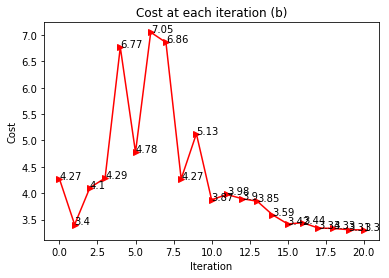

In [23]:
fig, ax = plt.subplots()
A = loss
n = range(len(A))
plt.plot(n,A,'r->')
for i, txt in enumerate(A):
    ax.annotate(round(txt,2), (n[i],A[i]))
plt.xlabel('Iteration')
plt.title('Cost at each iteration (b)')
plt.ylabel('Cost')
plt.show()

In [24]:
# converging point
w[-1]

array([ 0.31665327,  0.31669632])

In [25]:
# converging cost
loss[-1]

3.3031062823844062

#### (c) Repeat part (b) using Newton’s method.

In [26]:
np.random.seed(45)
def Hmatrix (w):
    x = w[0]
    y = w[1]
    mat = [[(1/(1-x-y)**2+1/x**2),(1/(1-x-y)**2)],[(1/(1-x-y)**2),(1/(1-x-y)**2+1/y**2)]]
    out = np.asarray(mat)
    return out
#  setup
w = list()
loss = list()
epsilon = 0.005
eta = 1
j= 0
# give a dummy start point which will be deleted later so that index is working
temp = np.array([0.1,0.8])
temploss = losfunction(temp)
w.append(temp)
loss.append(temploss)

# initialize the starting point w_0 in D
temp = np.random.uniform(0,1,2)
while (np.sum(temp)>=1):
        temp = np.random.uniform(0,1,2)
# append the first point in w
w.append(temp)
temploss = losfunction(temp)
loss.append(temploss)

# the while loops ends when converge
while (np.abs(loss[-1]-loss[-2])>=epsilon):
    # find the gradient
    g = np.array([(1/(1-np.sum(w[-1]))-1/w[-1][0]),(1/(1-np.sum(w[-1]))-1/w[-1][1])])
    H = Hmatrix(w[-1])
    Hinv = np.linalg.inv(H)
    temp = w[-1]-eta*Hinv.dot(g)
    # if counter k is larger than 5, the overall eta will be reduced by 1/2
    etanew = eta
    k = 0
    # if the temp is outside the D, will redo the while loop and add the counter
    while (sum(temp)>=1 or temp[0]<=0 or temp[1]<=0):
        etanew = etanew/2
        temp = w[-1]-etanew*Hinv.dot(g)
        k += 1
        j += 1
    w.append(temp)
    temploss = losfunction(temp)
    loss.append(temploss)
    
    if k>=5:
        eta = eta/2
# delete the dummy point
del(w[0])
del(loss[0])
# convert w to ndarray for plot
w = np.asarray(w)


#### <span style = 'color:red'>Q. Report your initial point w0 and η of your choice.</span>
#### <span style = 'color:blue'>The intial point is at [ 0.2814473 ,  0.07728957]. The intial eta is 1, but if the update is out of boundaries, eta will temporarily shrink by 1/2 until the update is within boundaries. Also, if it takes for more than 5 temporaty attempts to shrink the eta for one iteration, the overall eta will be shrinked by 1/2.However, unlike the gradient descendent, eta stays at 1. </span>

#### <span style = 'color:red'>Q. Draw a graph that shows the trajectory followed by the points at each iteration. </span>

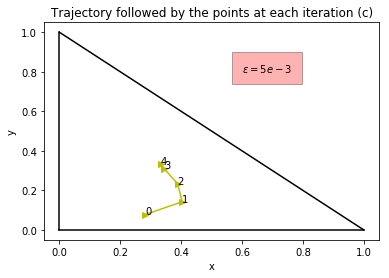

In [27]:
fig, ax = plt.subplots()
A = w[:,0]
B = w[:,1]
n = range(len(w))
plt.plot(A,B,'y->')
C = list(A)
for i, txt in enumerate(C):
    ax.annotate(n[i], (A[i],B[i]))
plt.plot([0,1],[1,0],'k-')
plt.plot([0,1],[0,0],'k-')
plt.plot([0,0],[0,1],'k-')
plt.xlabel('x')
plt.title('Trajectory followed by the points at each iteration (c)')
plt.ylabel('y')
ax.text(.6, .8, '$\epsilon =5e-3$', style='italic',
        bbox={'facecolor':'red', 'alpha':0.3, 'pad':10},fontsize = 10)
plt.show()

#### <span style = 'color:red'>Q. Plot the energies f(w0), f(w1), . . . , achieved by the points at each iteration. </span>

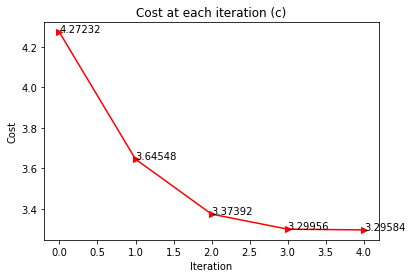

In [28]:
fig, ax = plt.subplots()
A = loss
n = range(len(A))
plt.plot(n,A,'r->')
for i, txt in enumerate(A):
    ax.annotate(round(txt,5), (n[i],A[i]))
plt.xlabel('Iteration')
plt.title('Cost at each iteration (c)')
plt.ylabel('Cost')
plt.show()

In [29]:
# converging point
w[-1]

array([ 0.33385717,  0.33241947])

In [30]:
# converging cost
loss[-1]

3.2958425486216987

#### (d) Compare the speed of convergence of gradient descent and Newton’s method, i.e. how fast does each method approach the estimated global minimum?

 <span style = 'color:blue'> With the same intialized starting point and eta, and the same convergence condition, it took gradient descent **21** epochs while **5** for the Newton's method. Meanwhile,this was accomplished with the "smart" shrinkage programming on the eta on both methods. In the gradient descent case, the gloabal eta shrunk down to 0.0625, while the global eta of Newton's method stayed at 1 for the whole time. Finally, the estimated global minimum is 3.303106 (gradient descent) vs. 3.295843 (Newton's method). In sum, with the appropriate choice of $\eta$ if the computation of the Hessian matrix and its inverse is not computation heavy, Newton's method can achieve the covergence faster and probably provide a more optimized cost function. It should be noted that a oversmall or overbig $\eta$ might make the Newton's method perform worse than the gradient descent method.

### Q.3

##### (a) Let xi = i, i = 1,...,50.
##### (b) Let yi = i + ui, i = 1,...,50, where each ui should be chosen to be an arbitrary real number between −1 and 1.

In [31]:
np.random.seed(45)
x = list(range(1,51))
x = np.asarray(x)
y = np.random.uniform(-1,1,50) + x


#### (c) Find the linear least squares fit to (xi , yi ), i = 1, . . . , 50. Note that the linear least squares fit is the line y = w0 + w1x, where w0 and w1 should be chosen to minimize  50 (yi − (w0 + w1xi))2.  

<span style = 'color:blue'> Let $W = [w_0, w_1], X = \begin{bmatrix}1 & 1 & \cdots & 1 \\ x_1 & x_2 & \cdots & x_{50} \end{bmatrix}, Y = \begin{bmatrix} y_1 & y_2 & \cdots & y_{50} \end{bmatrix}$.  
Thus, we are essentially finding $\underset{W}{\arg\min}||Y-WX||^2$. 
And we have already known that the solution to $Y-WX=0$ is $W^*_{L.S.} = YX^+$, where $X^+ = X^T(XX^T)^{-1}$ given X is full row. 
Therefore, $W^*_{L.S.} = YX^T(XX^T)^{-1}$ </span>

In [32]:
Y = y
X = np.vstack((np.repeat(1,50),x))
Wstar = Y.dot(np.transpose(X)).dot(np.linalg.inv(X.dot(np.transpose(X))))
Wstar

array([-0.049585  ,  0.99941613])

<span style = 'color:blue'> So w<sub>0</sub> =  -0.049585, w<sub>1</sub> = 0.99941613 are to chosen to minimize E.</span> 

#### (d) Plot the points (xi; yi); i = 1; : : : ; 50 together with their linear least squares fit.

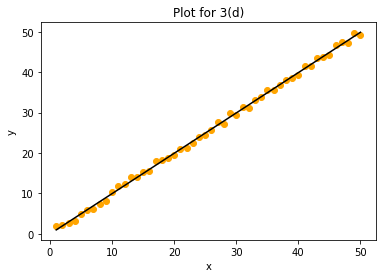

In [33]:
plt.scatter(x,y,color = 'orange')
yfit = [Wstar[0] + Wstar[1] * xi for xi in x]
plt.plot(x, yfit,color = 'black')
plt.xlabel('x')
plt.title('Plot for 3(d)')
plt.ylabel('y')
plt.show()

#### (e) Find (on paper) the gradient of  50 (yi −(w0 +w1xi))2 (derivatives with respect to w0 and w1).

<span style = 'color:blue'>
Let $E = \sum_{i=1}^{50}(y_i-(w_0+w_1x_i))^2$.  
Then $\nabla E = (\frac{\partial E}{\partial w_0},\frac{\partial E}{\partial w_1}) = (-2\sum_{i=1}^{50}(y_i-(w_0+w_1x_i)),-2\sum_{i=1}^{50}((y_i-(w_0+w_1x_i))x_i) = 2(Y-WX)X^T$.  
Thus, the update will be: $w \leftarrow w - \eta \nabla E$
</span>

#### (f) (Re)find the linear least squares fit using the gradient descent algorithm. Compare with (c).

In [34]:
np.random.seed(45)
# define a cost function
def cost_function (w):
    cost = np.sum((Y-w.dot(X))**2)
    return cost

#  setup
w = list()
cost = list()
epsilon = 1e-6
eta = 3e-4
j = 0

# give a dummy start point which will be deleted later so that index is working
temp = np.array([0.1,0.8])
temploss = cost_function(temp)
w.append(temp)
cost.append(temploss)

# initialize the starting point w_0 in D
temp = np.random.uniform(0,1,2)
# append the first point in w
w.append(temp)
temploss = cost_function(temp)
cost.append(temploss)

# the while loops ends when converge
while (np.abs(cost[-1]-cost[-2])>=epsilon):
    # find the gradient
    g = np.array([-2*np.sum(Y-w[-1].dot(X)),-2*np.sum((Y-w[-1].dot(X)) * x)])/50
    temp = w[-1]-eta*g
    w.append(temp)
    temploss = cost_function(temp)
    cost.append(temploss)
    j += 1

# delete the dummy point
del(w[0])
del(cost[0])
# convert w to ndarray for plot
w = np.asarray(w)
j

28427

In [35]:
w[-1]

array([-0.03274961,  0.99891593])

In [36]:
cost_function(Wstar)

16.526723550620243

In [37]:
cost[-1]

16.530161196220153

#### <span style='color:red'> Compare with (c).</span>

<span style='color:blue'>So w<sub>0</sub> =  -0.03275, w<sub>1</sub> = 0.99892 are to chosen to by the gradient descent method after 28427 epoch (batch version), compared with the w<sub>0</sub> =  -0.049585, w<sub>1</sub> = 0.99941613 chosen by the least square mothod in one iteration. The cost by gradient descent is 16.53016, while the least square's cost is 16.52672. And an appropriate choice of $\eta$ for gradient descent is tricky.</span>

#### (g) Show (on paper) that a single iteration of Newton’s method with η = 1 provides the globally optimal solution (the solution in (c)) regardless of the initial point.

<span style = 'color:blue'> 
From (c), we have already known that the least square  $W^*_{L.S.} = YX^T(XX^T)^{-1}$.  
By gradient descent method, the gradient is: $\nabla E = \frac{\partial (Y-WX)(Y-WX)^T}{\partial W} = 2(Y-WX)X^T$.  
And the Hessian matrix is: $H = \frac{\partial \nabla E}{\partial W} = \frac{\partial 2(Y-WX)X^T}{\partial W} =-2XX^T$, and $H^{-1} = -\frac{1}{2}(XX^T)^{-1}$.  
Thus, $W^*_{G.D.} = W - \eta \nabla E H^{-1} = W + (Y-WX)X^T(XX^T)^{-1} = W + YX^T(XX^T)^{-1} - W = YX^T(XX^T)^{-1} = W^*_{L.S.}$
</span>